In [ ]:
import boto3
from sagemaker.analytics import TrainingJobAnalytics, HyperparameterTuningJobAnalytics
from visualization_helpers import visualize_phase, plot_metrics_with_best_epoch
import pandas as pd
import sagemaker
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get Results for all phases

In [3]:
def get_exp_df(job_name, 
               features=None
               ):
    tuning_job_analytics = HyperparameterTuningJobAnalytics(job_name)
    df = tuning_job_analytics.dataframe()
    exclude_columns = [
                       "TrainingJobStatus",
                       "TrainingJobName",
                       "TrainingJobStatus",
                       "TrainingStartTime",
                       "TrainingEndTime"
                       ]
    features = [col for col in df.columns if col not in exclude_columns]
    filtered_df = df.query("TrainingJobStatus=='Completed'").sort_values("FinalObjectiveValue", ascending = False)[features]
    return df, filtered_df

In [ ]:
# Specify the name of your hyperparameter tuning job
job_name_phase1 = 'improved-clip-phase1-241123-1516'
job_name_phase2 = 'improved-clip-phase2-241124-0406'
job_name_phase3 = "improved-clip-phase3-241127-1727"
job_name_phase3_extended = "improved-clip-phase3-241128-1503"


df_phase1, filtered_df_phase1 = get_exp_df(job_name_phase1)
df_phase2, filtered_df_phase2 = get_exp_df(job_name_phase2)
df_phase3_first, filtered_df_phase3_first = get_exp_df(job_name_phase3)
df_phase3_ext, filtered_df_phase3_ext = get_exp_df(job_name_phase3_extended)
df_phase3 = pd.concat([df_phase3_first, df_phase3_ext], axis = 0)
filtered_df_phase3 = pd.concat([filtered_df_phase3_first, filtered_df_phase3_ext], axis = 0)

[11/29/24 21:40:43] INFO     Found credentials in shared credentials file: ~/.aws/credentials   ]8;id=710525;file://d:\projects\improved-clip\src\.venv\lib\site-packages\botocore\credentials.py\credentials.py]8;;\:]8;id=105796;file://d:\projects\improved-clip\src\.venv\lib\site-packages\botocore\credentials.py#1278\1278]8;;\

## Phase 1

Figure saved to ../../report_figures\phase_1\loss_function_vs_optimizer_phase_1_dim_opt.png


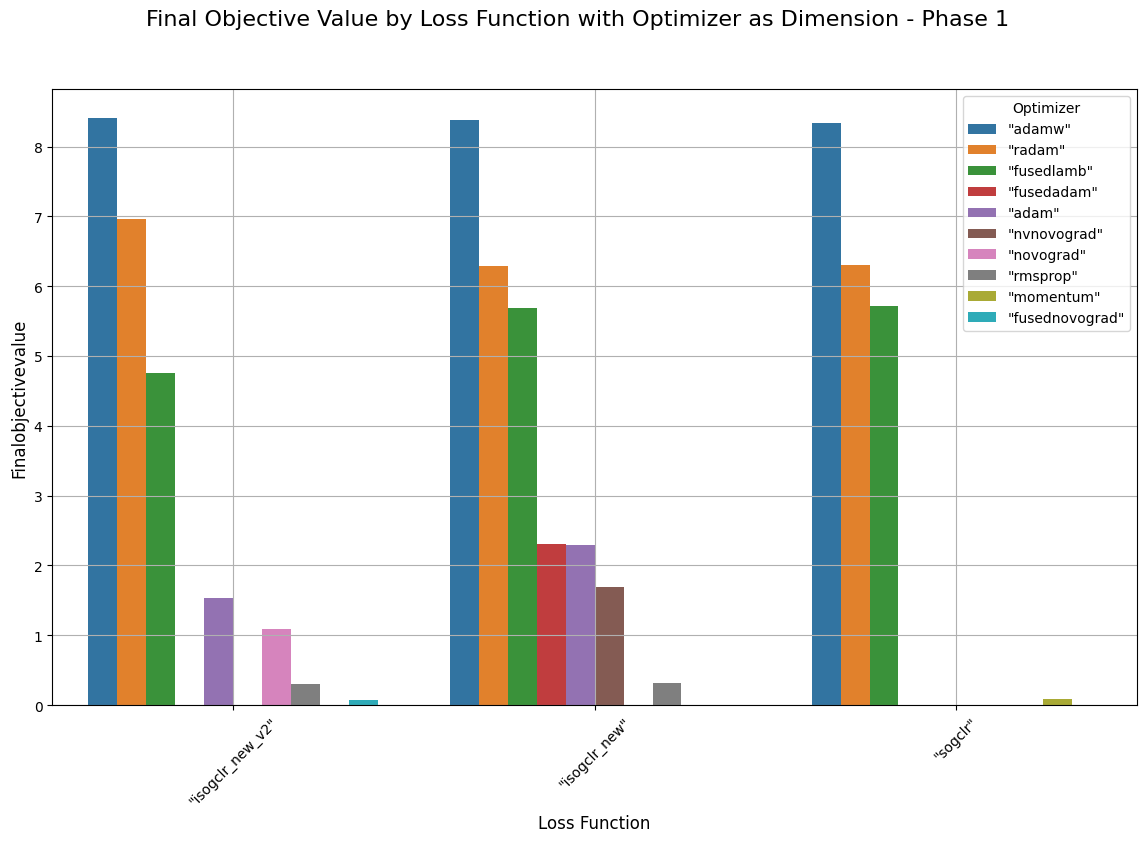

Figure saved to ../../report_figures\phase_1\loss_function_vs_optimizer_phase_1_dim_loss.png


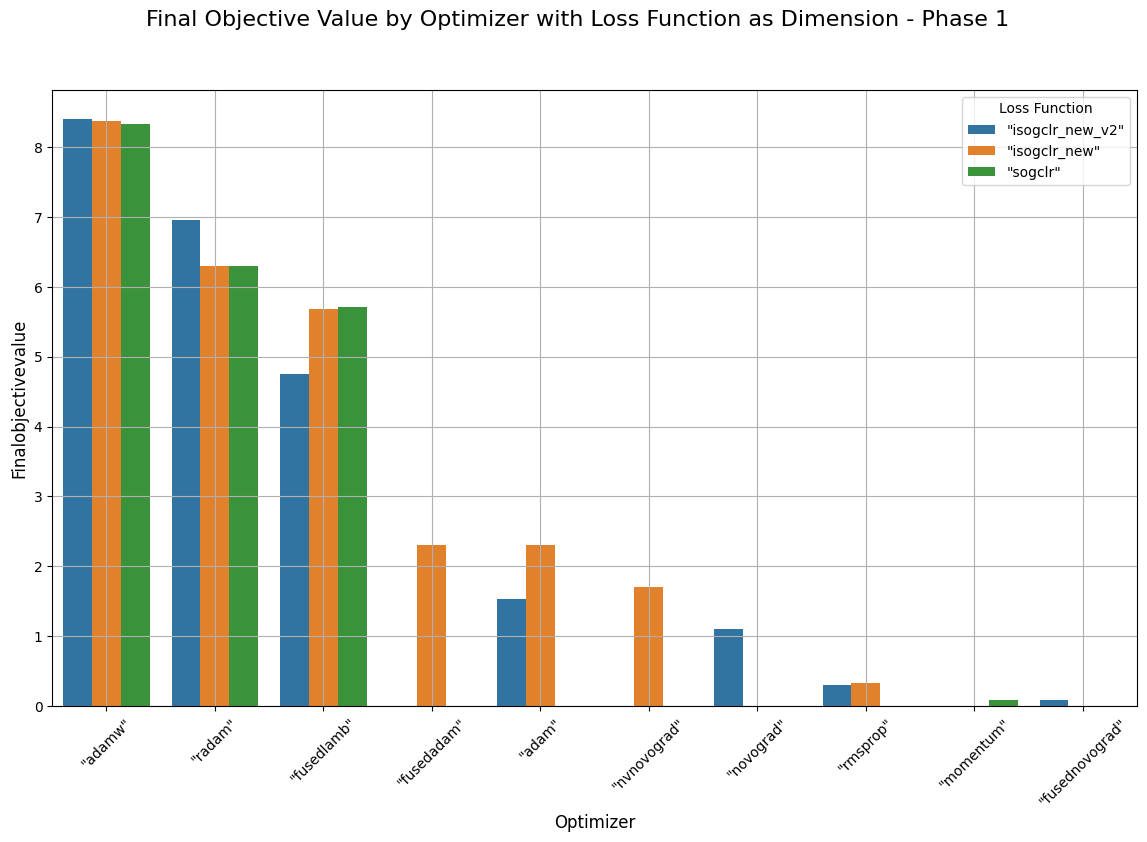

Figure saved to ../../report_figures\phase_1\objective_metric_progress_phase_1.png


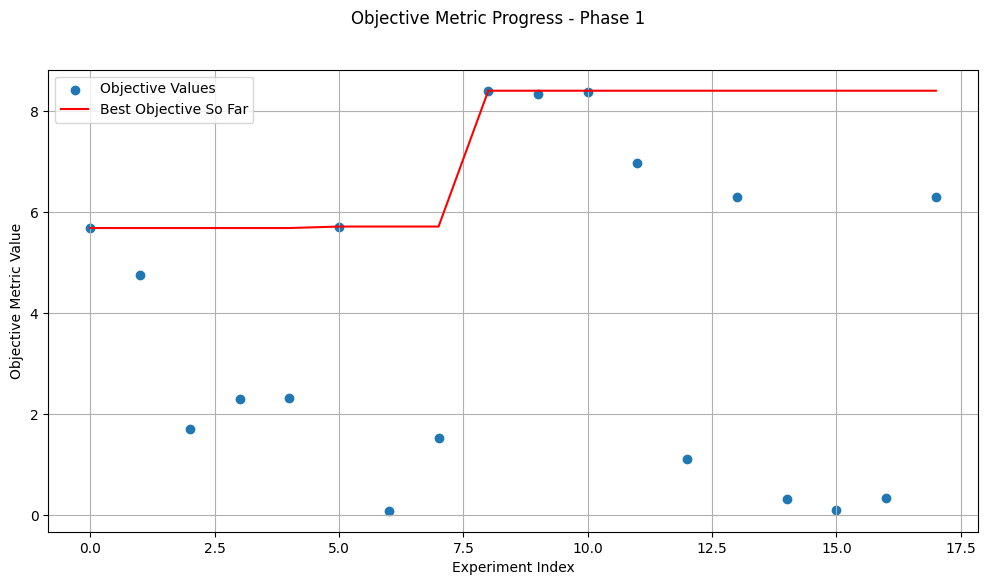

Figure saved to ../../report_figures\phase_1\relative_importance_phase_1.png


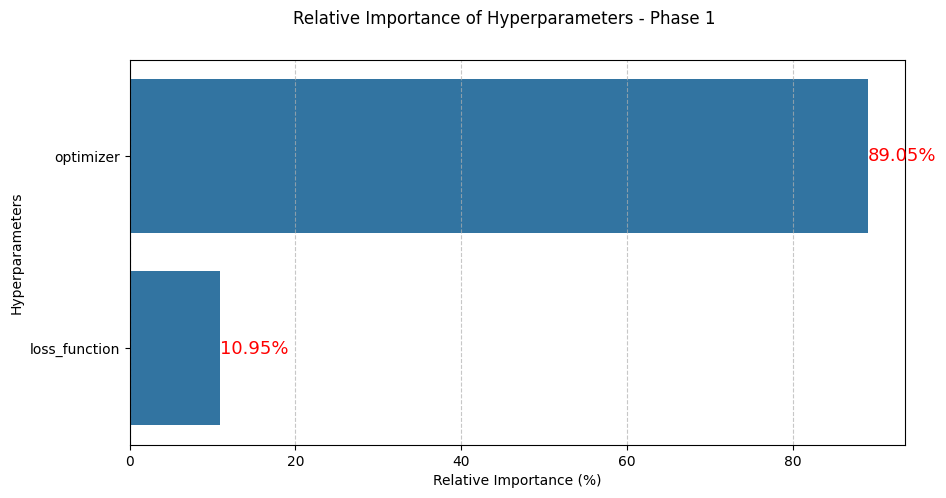

In [5]:
visualize_phase(
    df_phase1, 
    filtered_df_phase1, 
    phase_number=1,
    output_dir = "../../report_figures"
    )

## Phase 2

Figure saved to ../../report_figures\phase_2\loss_function_vs_optimizer_phase_2_dim_opt.png


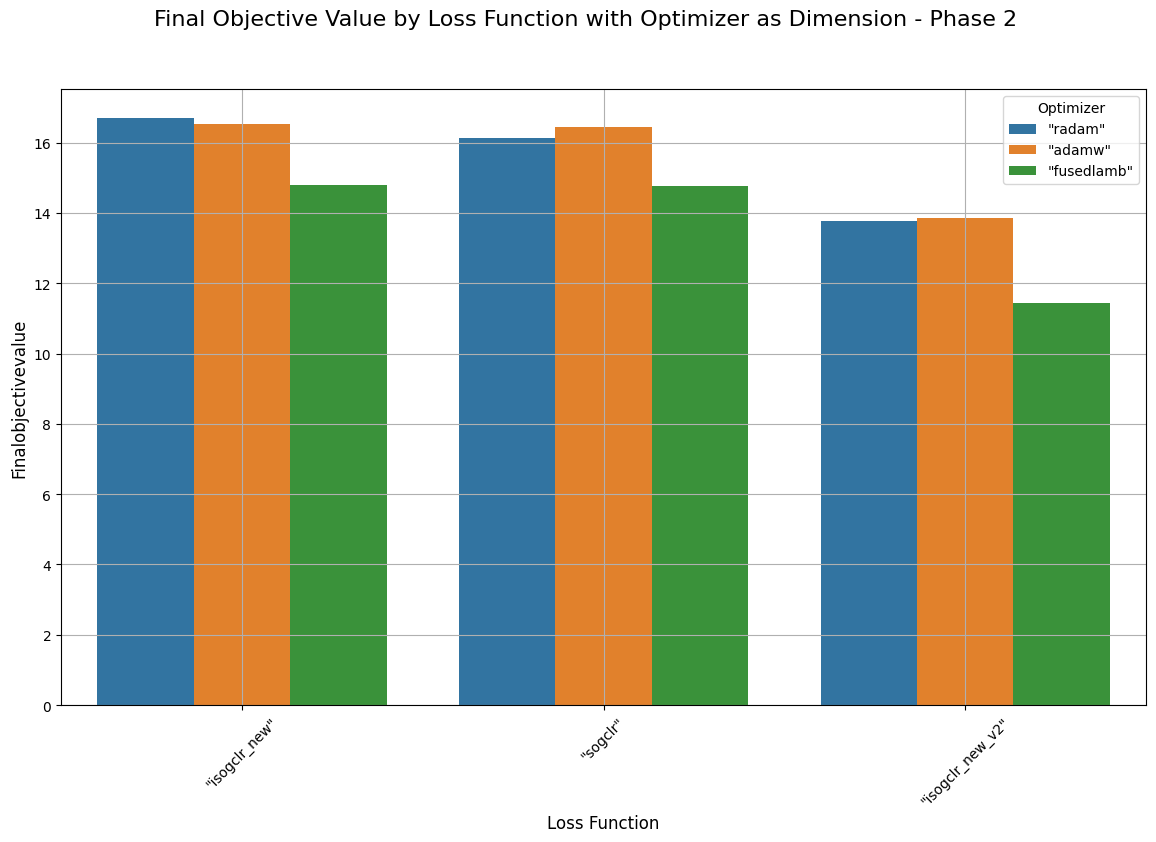

Figure saved to ../../report_figures\phase_2\loss_function_vs_optimizer_phase_2_dim_loss.png


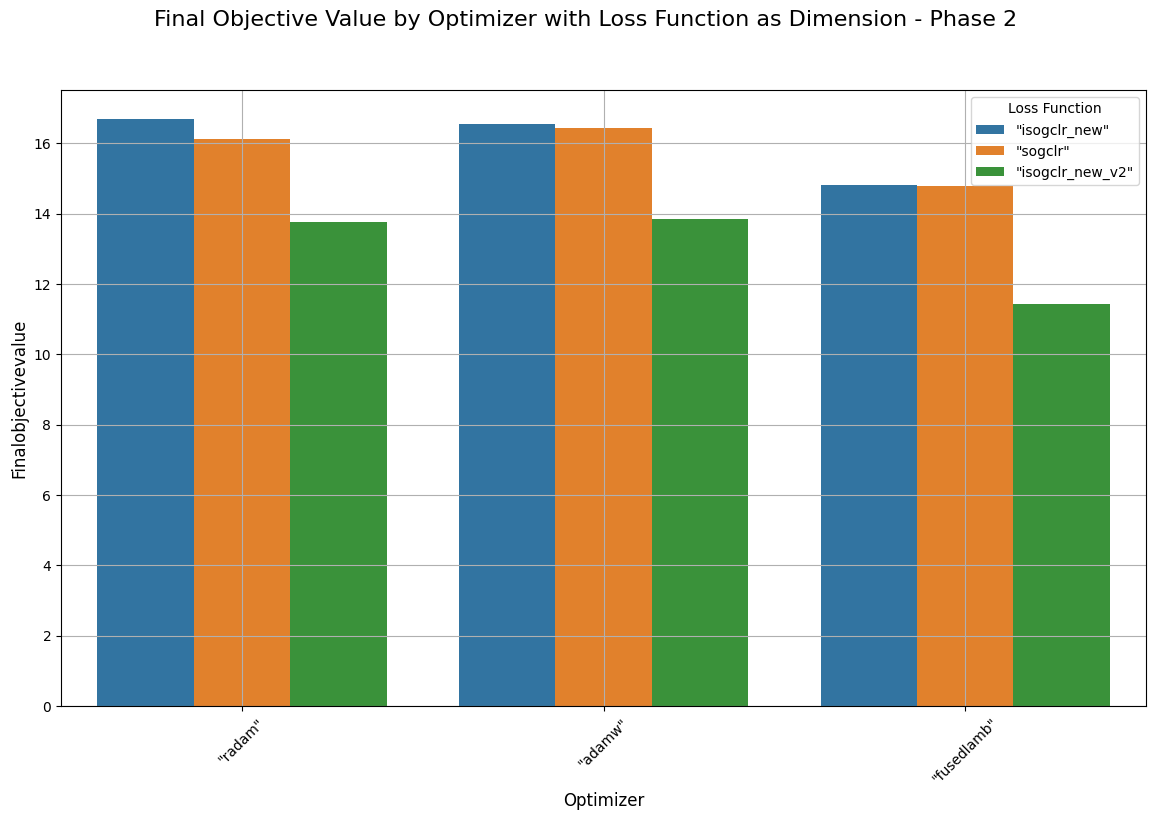

Figure saved to ../../report_figures\phase_2\objective_metric_progress_phase_2.png


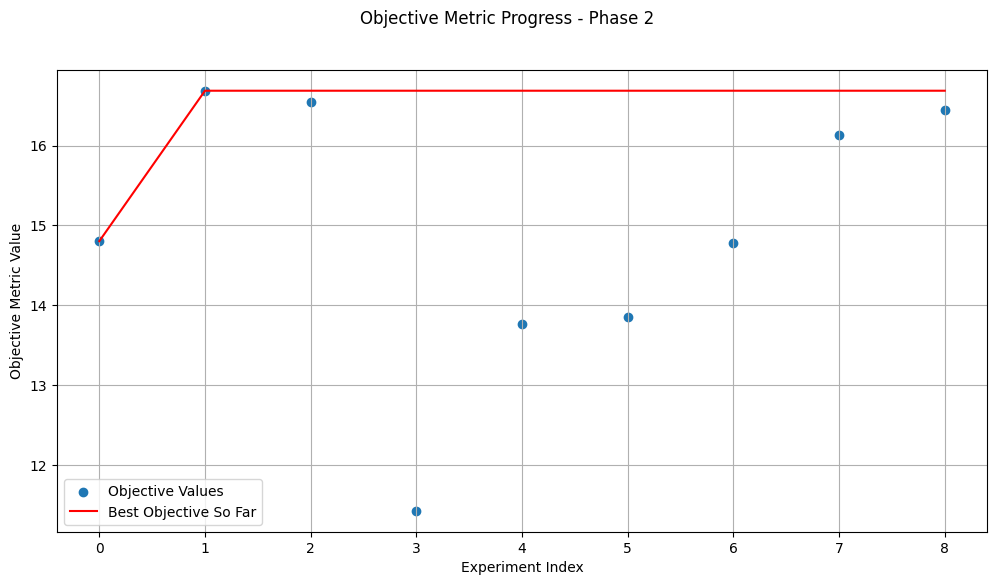

Figure saved to ../../report_figures\phase_2\relative_importance_phase_2.png


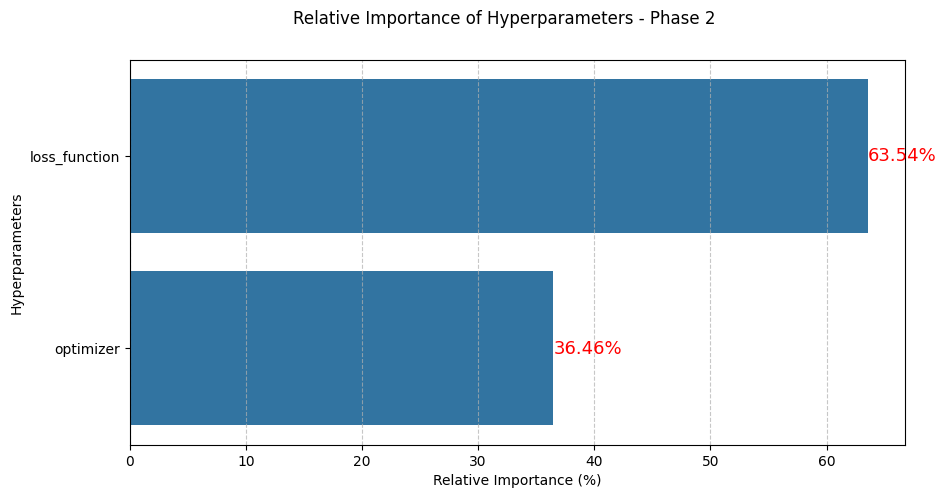

In [6]:
visualize_phase(
    df_phase2, 
    filtered_df_phase2, 
    phase_number=2,
    output_dir = "../../report_figures"
    )

## Phase 3

Figure saved to ../../report_figures\phase_3\objective_metric_progress_phase_3.png


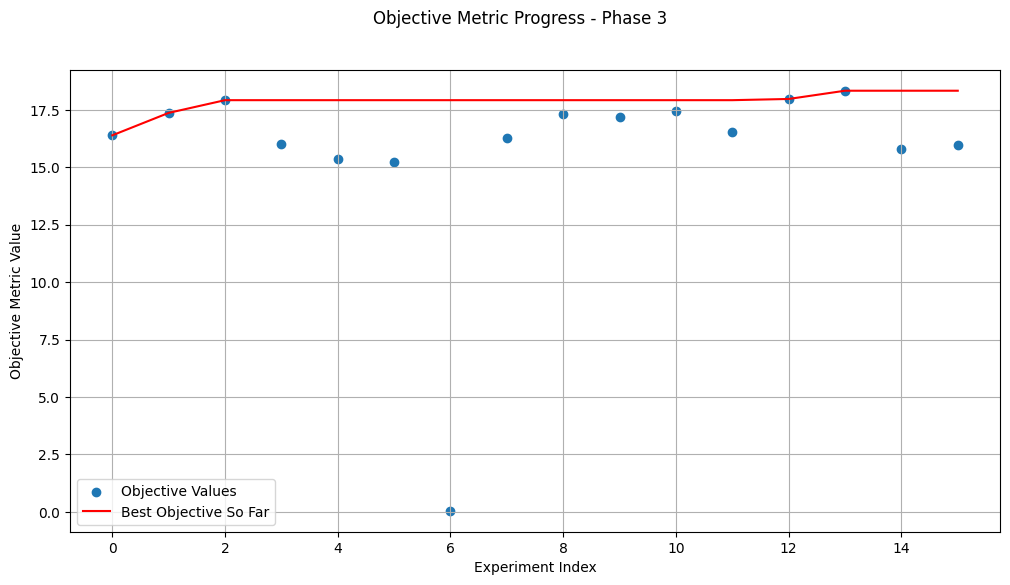

Figure saved to ../../report_figures\phase_3\relative_importance_phase_3.png


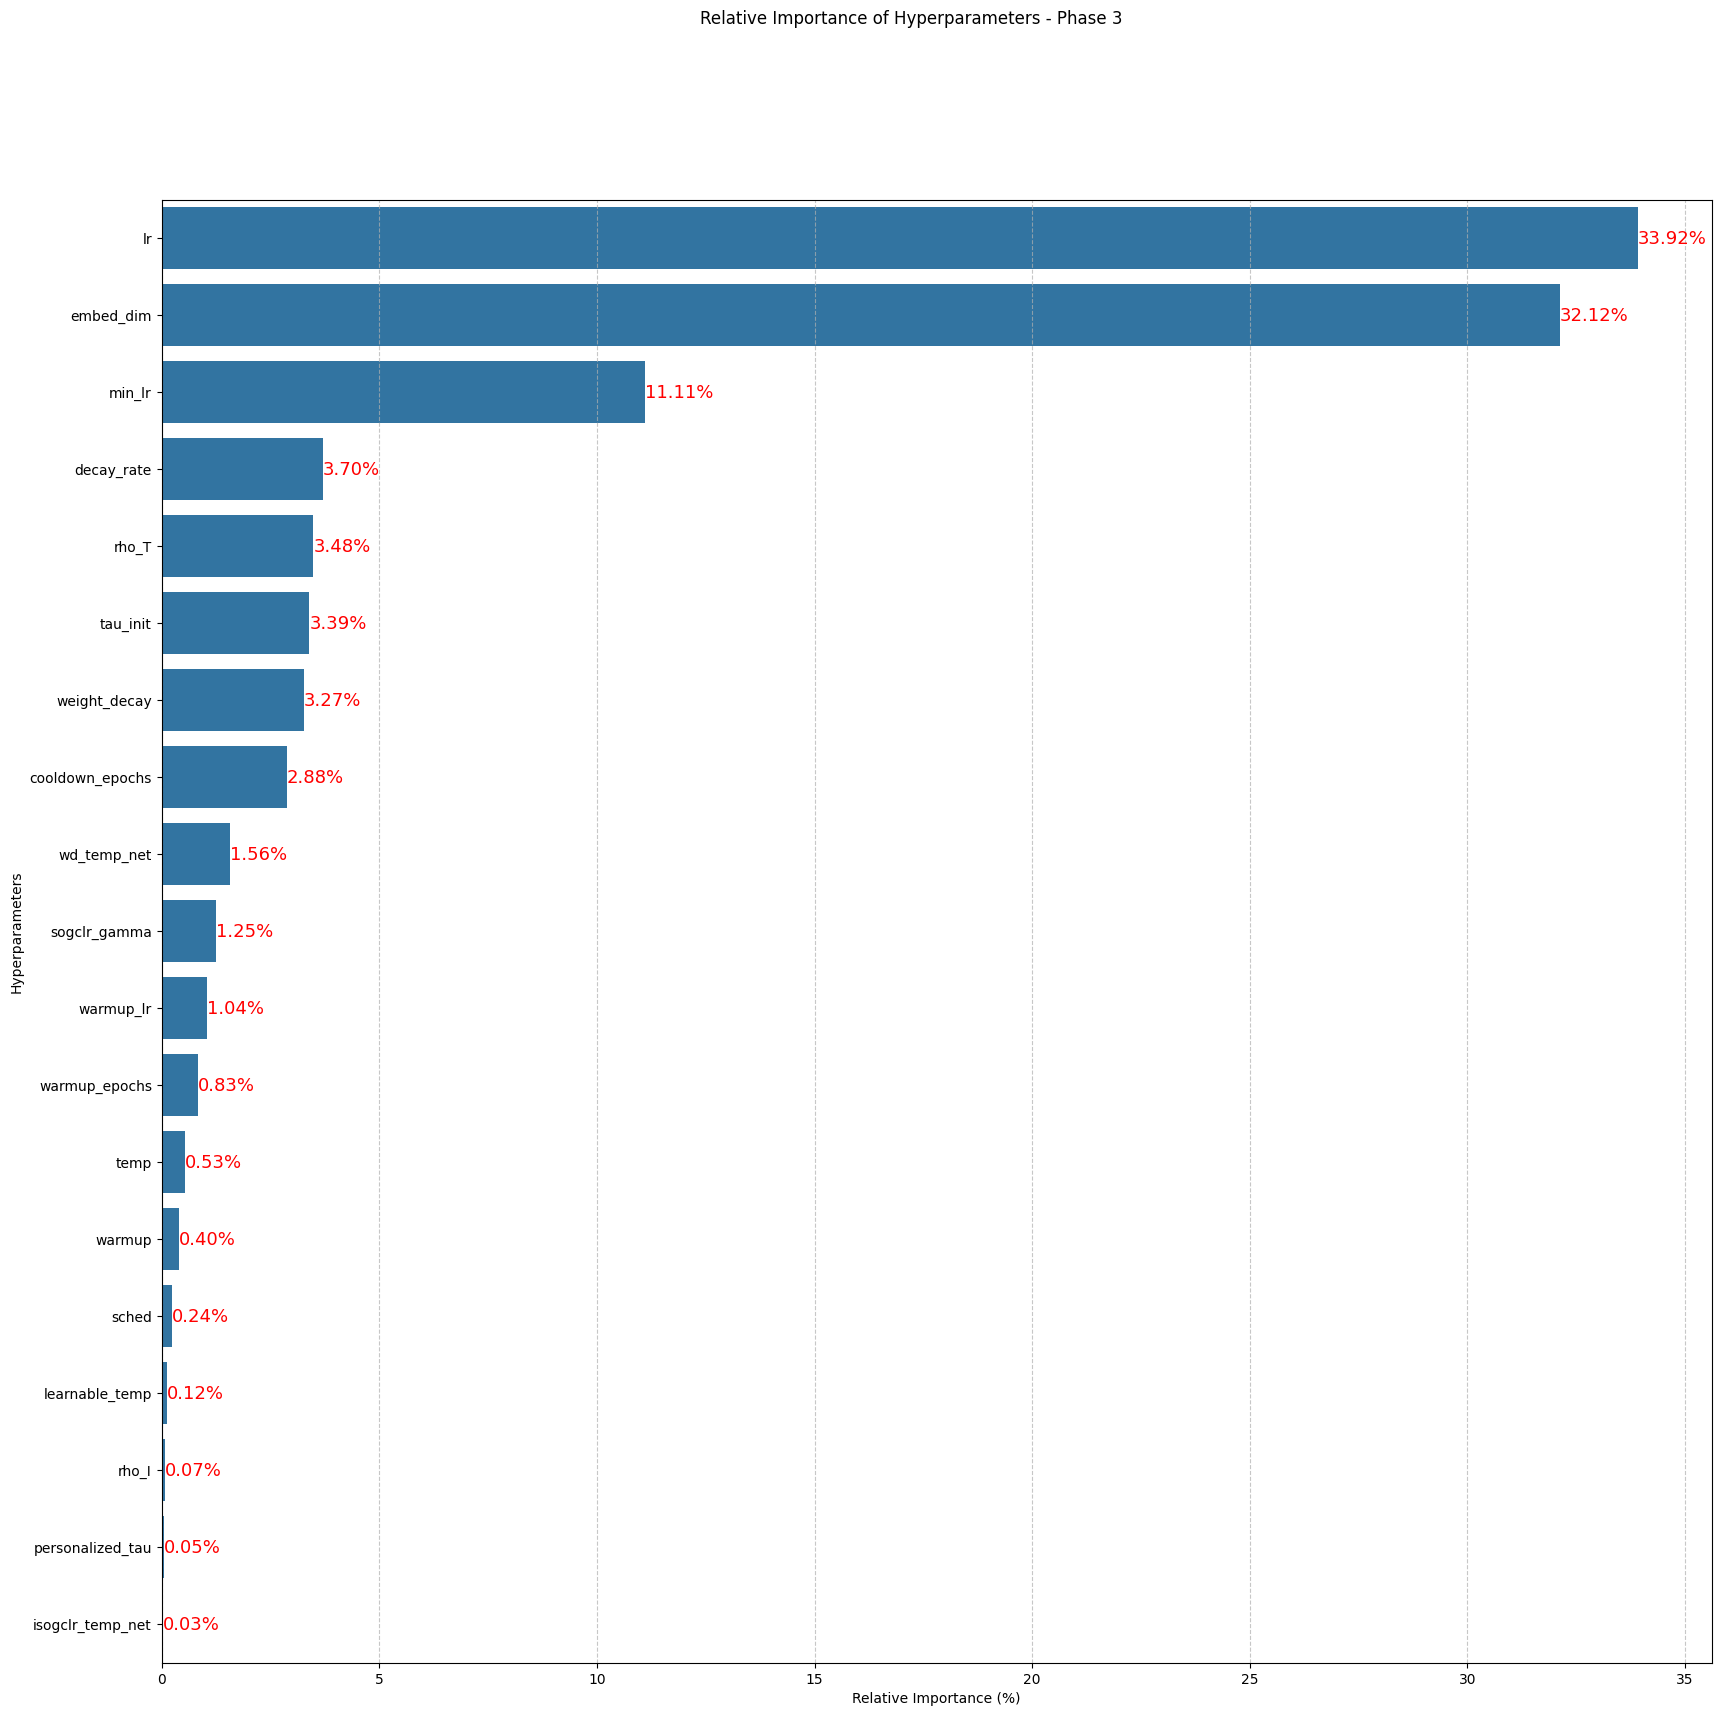

In [7]:
visualize_phase(
    df_phase3, 
    filtered_df_phase3, 
    phase_number=3,
    output_dir = "../../report_figures"
    )

## Analysis For Best Training Job

In [ ]:
sagemaker_session = sagemaker.Session()
training_job_name = 'improved-clip-phase3-241128-1503-006-faa1030f'
analytics = TrainingJobAnalytics(
    training_job_name=training_job_name,
    sagemaker_session=sagemaker_session
)
df = analytics.dataframe()


In [16]:
metrics = df['metric_name'].unique()

# Dictionary to store DataFrames for each metric
metric_dataframes = {}

# Separate each metric into its own DataFrame
for metric in metrics:
    metric_dataframes[metric] = df[df['metric_name'] == metric].reset_index(drop=True)

In [18]:
metric_dataframes.keys()

dict_keys(['LearningRate', 'Iteration_loss', 'AvgImageTau', 'AvgTextTau', 'GradTauImage', 'GradTauText', 'AvgEpochLoss', 'ValidationEpoch', 'ObjectiveValue', 'BestObjectiveValue', 'ValidationTxtR1', 'ValidationImgR1', 'ValidationZS1', 'MovingAvgObjectiveValue', 'ObjectiveMetric'])

<Axes: title={'center': 'Iteration Loss'}, xlabel='Iteration', ylabel='Iteration Loss'>

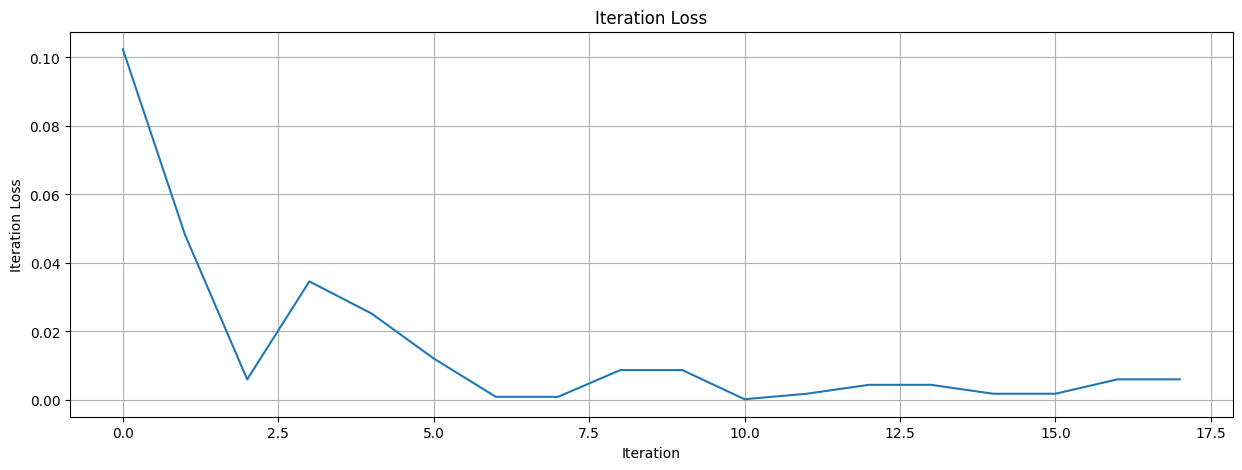

In [43]:
metric_dataframes["Iteration_loss"].plot(
    y= 'value', 
    xlabel = 'Iteration', 
    ylabel = 'Iteration Loss', 
    grid= 'on', 
    title = 'Iteration Loss',
    legend = False,
    figsize = (15, 5)
    )

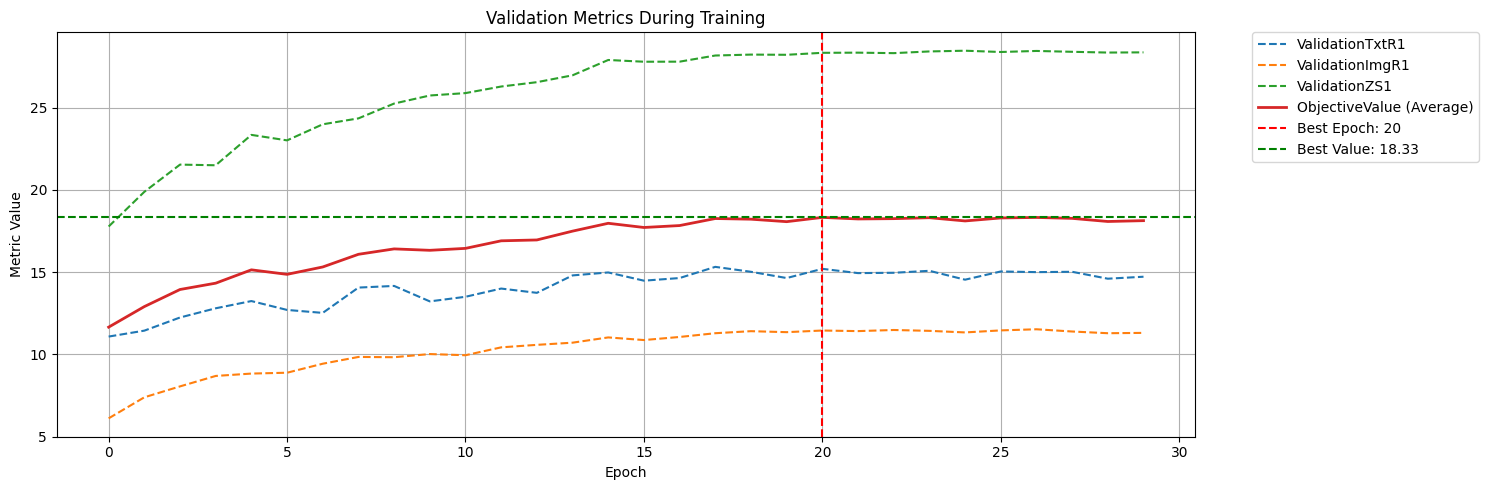

In [41]:
plot_metrics_with_best_epoch(metric_dataframes)

<Axes: title={'center': 'metric_name'}, xlabel='timestamp'>

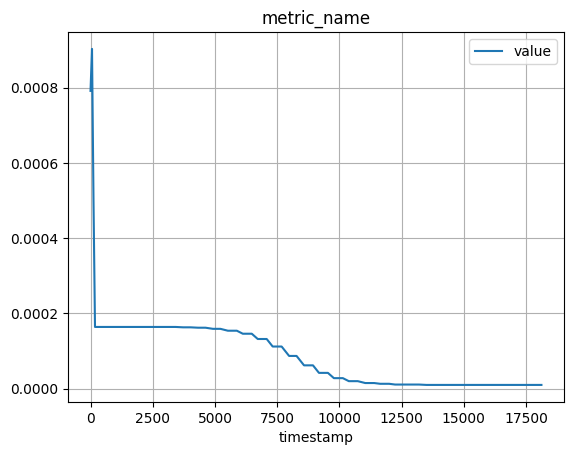

In [22]:
metric_dataframes["LearningRate"].plot(x= 'timestamp', y= 'value', title = 'metric_name', grid = 'on')